In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('GermanCredit.csv')

In [3]:
#[8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [4]:
dropN = 3
temp_df = df[df[:] == 'none'].count().sort_values(ascending=False)
for x in range(dropN):
    df.drop([temp_df.keys()[x]],axis=1, inplace=True)

In [5]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


In [6]:
df.replace('\'','', regex=True, inplace=True) 
#[4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.

In [7]:
#[5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.
df['checking_status'].replace({'no checking':'No Checking',
                              '<0':'Low',
                              '0<=X<200':'Medium',
                              '>=200':'High'}, inplace = True)

In [8]:
#The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').
df['savings_status'].replace({'no known savings':'No Savings',
                              '<100':'Low',
                              '100<=X<500':'Medium',
                              '500<=X<1000':'High',
                             '>=1000':'High'}, inplace = True)

In [9]:
#[4 pts] Change class column values from 'good' to '1' and 'bad' to '0'
df['class'].replace({'good':'1',
                    'bad':'0'}, inplace = True)

In [10]:
#[5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.
df['employment'].replace({'unemployed':'Unemployed',
                              '<1':'Amateur',
                              '1<=X<4':'Professional',
                              '4<=X<7':'Experienced',
                         '>=7':'Expert'}, inplace = True)

In [31]:
#[5 pts] Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.
pd.crosstab(df['class'],df['foreign_worker'])

foreign_worker,no,yes
class,,
0,4,296
1,33,667


In [32]:
pd.crosstab(df['employment'],df['savings_status'])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


In [13]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


In [14]:
#[4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.
df1 = df.loc[(df['employment'] == 'Experienced') & (df['personal_status'] == 'male single'),['credit_amount']]
avg = df1.mean()
print(avg)

credit_amount    4142.592593
dtype: float64


In [15]:
#[4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.
df2 = pd.crosstab(df['job'],df['duration'])

In [16]:
df2

duration,4,5,6,7,8,9,10,11,12,13,...,36,39,40,42,45,47,48,54,60,72
job,,,,,,,,,,,,,,,,,,,,,
high qualif/self emp/mgmt,0,0,9,0,1,6,1,1,18,0,...,21,2,0,2,0,0,10,0,6,0
skilled,1,0,42,4,3,30,14,5,106,2,...,56,3,1,7,4,0,34,1,6,1
unemp/unskilled non res,0,0,5,0,0,1,0,0,4,0,...,1,0,0,1,0,0,1,0,0,0
unskilled resident,5,1,19,1,3,12,13,3,51,2,...,5,0,0,1,1,1,3,1,1,0


In [34]:
df2.mean(axis = 1)

job
high qualif/self emp/mgmt     4.484848
skilled                      19.090909
unemp/unskilled non res       0.666667
unskilled resident            6.060606
dtype: float64

In [35]:
#[4 pts] For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:
commonCheck = df['checking_status'].mode()
print('Most common checking status: ' + commonCheck)

0    Most common checking status: No Checking
dtype: object


In [36]:
savingCheck = df['savings_status'].mode()
print('Most common saving status: ' + savingCheck)

0    Most common saving status: Low
dtype: object


In [20]:
#[9 pts] Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.
new = pd.crosstab(df.savings_status,df.personal_status)

<AxesSubplot:ylabel='Frequency'>

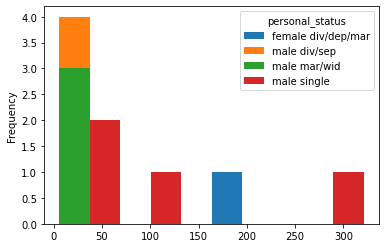

In [21]:
new.plot(kind = 'hist')

In [37]:
#[9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).
v2 = df.loc[(df.credit_amount > 4000),['property_magnitude','age']]

In [38]:
v3 = pd.crosstab(v2.property_magnitude,v2.age)

<AxesSubplot:xlabel='property_magnitude'>

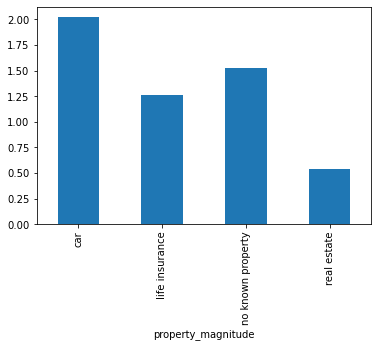

In [39]:
v3.mean(axis = 1).plot(kind = 'bar')

In [26]:
#6 pts] For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
Personal status
pie1 = df.loc[(df.savings_status == 'High') & (df.age > 40),['personal_status','credit_history','job']]

<AxesSubplot:ylabel='None'>

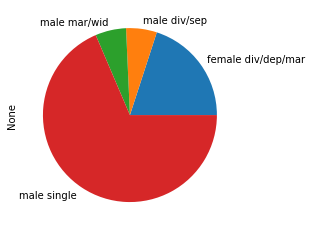

In [27]:
pie1.groupby('personal_status').size().plot(kind = 'pie')

<AxesSubplot:ylabel='None'>

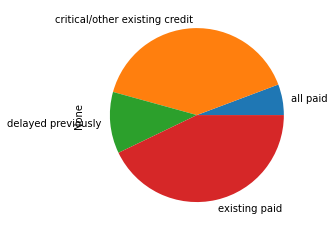

In [28]:
pie1.groupby('credit_history').size().plot(kind = 'pie')

<AxesSubplot:ylabel='None'>

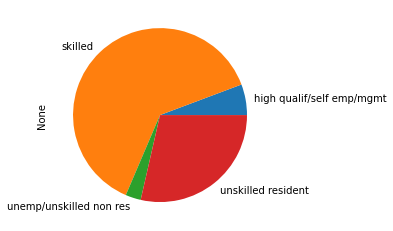

In [29]:
pie1.groupby('job').size().plot(kind = 'pie')

In [30]:
new

personal_status,female div/dep/mar,male div/sep,male mar/wid,male single
savings_status,,,,
High,35,8,11,57
Low,194,30,58,321
Medium,32,6,11,54
No Savings,49,6,12,116
